# Zona de Pruebas

Este notebook se usa para probar la funcionalidades y aprender como funciona realmente la librería.

In [2]:
from CraftingTable import CraftingTable
from ctgan import load_demo
real_data = load_demo()

Primero instanciamos un objeto de la clase CraftingTable.

*CraftingTable* nos sirve como recipiente para permitirnos cargar un modelo generativo de datos tabulares, ajustarlo a un conjunto de datos reales, generar datos sintéticos y evaluarlos, mientras mantenemos un registro de metadatos sobre las acciones que van sucediendo.

In [3]:
ct = CraftingTable()

Funciones Básicas:

- *create_model*: Primera función a ejecutar siempre que se instancia un objeto de la clase CraftingTable. Se le pasa por parámetro el nombre del modelo que se desea usar para generar los datos sintéticos y opcionalmente los hiperparámetros de este. Esta función inicializa una instancia nueva del modelo seleccionado.

- *fit*: Entrena el modelo cargado para que aprenda a generar datos sintéticos como los reales. Recibe por parámetro un DataFrame de datos reales y opcionalmente una lista con las columnas discretas, el número de épocas, y si se desea que se imprima la información del entrenamiento mientras sucede. Esta función modifica los metadatos del modelo.

- *sample*: Genera datos sintéticos. Recibe por parámetro el número de filas a generar y opcionalmente una columna y un valor para ésta fijados. Además, cuenta con un último parámetro solo aplicable al modelo "ctgan", que permite al usuario elegir si generar datos únicamente con el valor deseado en la columna deseada o que estos solo tengan una mayor probabilidad de ser generados. Esta función modifica los metadatos del modelo.

- *get_metadata*: Devuelve el registro de metadatos hasta el momento. Esta función no recibe nada por parámetro.

- *save*: Guarda el modelo. Opcionalmente, se puede seleccionar el nombre con el que el modelo se guardará.

- *load*: Carga un modelo de un archivo anteriormente guardado. Esta función recibe el path al archivo que contiene los datos del modelo. Es necesario haber ejecutado la función *create_model* con anterioridad para tener un modelo de ese tipo instanciado donde cargar los datos.

Funciones de Evaluación:

- *eval_stat*: Se evalúa la precisión de la generación de datos del modelo mediante tests estadísticos. Recibe por parámetro un DataFrame de datos reales con los que comparar y un string representando el nombre del test estadístico a realizar. Opcionalmente, se le puede pasar un DataFrame de datos sintéticos para comparar con los reales, en caso contrario, el modelo generará el mismo internamente estos datos.

- *eval_ml*: Se evalúa la eficacia de la generación de datos sintéticos para entrenar modelos de aprendizaje automático. Esta función recibe un DataFrame de datos reales, tres strings (nombre de la columna "target", tipo de tarea a realizar entre "regression"/"classification" y el nombre dentro del paquete Scikit-learn del modelo que se desea usar) y una lista con las métricas a devolver. Opcionalmente, se puede seleccionar también el tamaño de la partición de test y un DataFrame de datos sintéticos.

- *eval_plot*: Se generan gráficos para ver la similitud de las distribuciones entre datos reales y sintéticos. Esta función recibe un DataFrame de datos reales por parámetro, además de un string identificando el tipo de gráfico a realizar. Opcionalmente, se puede pasar un DataFrame de datos sintéticos por parámetro, además de una lista de las variables a graficar o incluso un número máximo de estas para los *pair plots*.

Empezamos creando el modelo. En este caso, al no pasarle los hiperparámetros, se usarán los predefinidos en el paper original de la CTGAN, aunque se pueden configurar a gusto de uno.

Actualmente, solo estan implementados dos modelos:

- CTGAN (Conditional Tabular Generative Adversarial Networks)
- TVAE (Tabular Variational AutoEncoder)

Ambos presentados en [este paper](https://arxiv.org/pdf/1907.00503).

In [5]:
ct.create_model("ctgan")

Model loaded successfully!


Es aconsejable pasarle la lista de columnas con valores discretos de nuestro conjunto de datos, ya que así nos aseguramos un correcto funcionamiento del modelo. Además, ajustaremos la CTGAN usando 60 épocas y escogeremos que se imprima la evolución del entrenamiento poniendo verbose a *True*. 

⚠️⚠️⚠️**NO ES NECESARIO PONERLO A ENTRENAR YA QUE HAY YA UN MODELO PREENTRENADO**⚠️⚠️⚠️

In [6]:
discrete_columns = [
    'workclass',
    'education',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native-country',
    'income'
]
epochs=60
verbose=True

In [5]:
ct.fit(data=real_data, discrete_columns=discrete_columns, epochs=epochs, verbose=verbose)

Gen. (-0.63) | Discrim. (-0.01): 100%|██████████| 60/60 [03:24<00:00,  3.41s/it]


{'Time_of_fit': '2025-02-10 22:43:11',
 'Fit_duration': '0:03:57',
 'Loss':     Epoch  Generator Loss  Discriminator Loss
 0       0        1.756758           -0.456761
 1       1        0.839443            0.253923
 2       2        0.328401           -0.208085
 3       3        0.248602           -0.080073
 4       4       -0.230069           -0.007754
 5       5       -0.666885            0.015966
 6       6       -0.914286           -0.216887
 7       7       -1.012164            0.030218
 8       8       -0.996854           -0.043916
 9       9       -1.236966            0.044173
 10     10       -1.395739           -0.115519
 11     11       -1.433202           -0.152096
 12     12       -1.628723           -0.248207
 13     13       -1.275016           -0.081089
 14     14       -1.332723           -0.088135
 15     15       -1.470378           -0.103068
 16     16       -1.610997           -0.332966
 17     17       -1.253235           -0.038527
 18     18       -1.133900      

In [ ]:
ct.save("model_ctgan.pt")

En el caso de querer usar cualquier otro modelo se haría de la misma forma. Lo podemos ver con un TVAE.

In [2]:
ct2 = CraftingTable()
ct2.create_model("tvae")

Model loaded successfully!


Como podemos ver, como el modelo tiene una arquitectura distinta (tiene una única función de pérdida), el DataFrame con el registro de entrenamientos es distinto al de la CTGAN.

In [5]:
ct2.fit(data=real_data, discrete_columns=discrete_columns, epochs=epochs, verbose=verbose)

Loss: -3.402: 100%|██████████| 60/60 [01:06<00:00,  1.10s/it]


{'Time_of_fit': '2025-02-13 20:06:10',
 'Fit_duration': '0:01:47',
 'Loss':     Epoch  Batch       Loss
 0       0     65  25.585648
 1       1     65  21.733553
 2       2     65  21.047813
 3       3     65  18.783045
 4       4     65  17.265469
 5       5     65  17.277298
 6       6     65  16.484190
 7       7     65  13.822274
 8       8     65  11.990491
 9       9     65  14.440418
 10     10     65  12.776869
 11     11     65  10.786728
 12     12     65  16.997997
 13     13     65  13.821415
 14     14     65  14.385057
 15     15     65   9.741064
 16     16     65   5.140640
 17     17     65   7.045690
 18     18     65  11.282905
 19     19     65   6.034390
 20     20     65   8.306002
 21     21     65  10.006420
 22     22     65   3.712504
 23     23     65   6.490187
 24     24     65   6.149992
 25     25     65   7.313799
 26     26     65   6.369188
 27     27     65   4.361494
 28     28     65   4.089222
 29     29     65   4.227335
 30     30     65   1.4145

In [6]:
ct2.save("model_tvae.pt")

Model saved successfully!


Volviendo al modelo de la CTGAN, vamos a seguir con un modelo ya anteriormente ajustado con los mismos hiperparámetros pero durante 60 épocas.

In [7]:
ct.load("model_ctgan_pretrained.pt")

Model loaded successfully


Al cargar el modelo, cargamos tambien los metadatos de este, por lo tanto podemos verlos.

In [8]:
metadata = ct.get_metadata()
metadata

{'table': {'random_seed': '',
  'columns': {'age': {'dtype': 'int64',
    'max': 90,
    'min': 17,
    'avg': 38.58164675532078,
    'std': 13.640223092304275,
    'median': 37.0},
   'workclass': {'dtype': 'object',
    'mode': 'Private',
    'nunique': 9,
    'value_counts': {'Private': 22696,
     'Self-emp-not-inc': 2541,
     'Local-gov': 2093,
     '?': 1836,
     'State-gov': 1298,
     'Self-emp-inc': 1116,
     'Federal-gov': 960,
     'Without-pay': 14,
     'Never-worked': 7}},
   'fnlwgt': {'dtype': 'int64',
    'max': 1484705,
    'min': 12285,
    'avg': 189778.36651208502,
    'std': 105548.3568808908,
    'median': 178356.0},
   'education': {'dtype': 'object',
    'mode': 'HS-grad',
    'nunique': 16,
    'value_counts': {'HS-grad': 10501,
     'Some-college': 7291,
     'Bachelors': 5355,
     'Masters': 1723,
     'Assoc-voc': 1382,
     '11th': 1175,
     'Assoc-acdm': 1067,
     '10th': 933,
     '7th-8th': 646,
     'Prof-school': 576,
     '9th': 514,
     '12th

Como se puede ver se guarda muchos metadatos del modelo usado, de los datos que se han usado para entrenar el modelo y logs del entrenamiento. Vamos a verlo más de cerca.

Primero podemos ver metadatos sobre la arquitectura, los hiperparámetros y el entrenamiento del modelo usado para generar los datos sintéticos.

In [22]:
metadata['model']

{'model_type': 'CTGAN',
 'hyperparameters': {'embedding_dim': 128,
  'generator_dim': (256, 256),
  'discriminator_dim': (256, 256),
  'generator_lr': 0.0002,
  'generator_decay': 1e-06,
  'discriminator_lr': 0.0002,
  'discriminator_decay': 1e-06,
  'batch_size': 500,
  'discriminator_steps': 1,
  'log_frequency': 1,
  'verbose': False,
  'epochs': 300,
  'pac': 10,
  'cuda': True},
 'fit_settings': {'times_fitted': 1,
  'fit_history': [{'Time_of_fit': '2025-02-10 21:13:40',
    'Fit_duration': '0:03:57',
    'Loss':     Epoch  Generator Loss  Discriminator Loss
    0       0        1.847255           -0.159656
    1       1        0.796563            0.172107
    2       2        0.673626            0.017621
    3       3        0.031972           -0.026015
    4       4       -0.362707           -0.097795
    5       5       -0.735892            0.042111
    6       6       -1.384943           -0.056766
    7       7       -1.118672           -0.161092
    8       8       -1.513437 

También tenemos metadatos sobre el conjunto de datos que hemos usado para entrenar este modelo. Por cada columna del modelo tenemos datos dependiendo de su tipo. Si son discretos, tenemos información sobre la moda, el número de clases y el número de casos de cada clase. En el caso de que sean continuos, tenemos información como el máximo, mínimo, media, desviación estándar...

Además tenemos metadatos de las correlaciones que tienen todas las columnas del dataset original entre ellas.

In [ ]:
metadata['table']

{'random_seed': '',
 'columns': {'age': {'dtype': 'int64',
   'max': 90,
   'min': 17,
   'avg': 38.58164675532078,
   'std': 13.640223092304275,
   'median': 37.0},
  'workclass': {'dtype': 'object',
   'mode': 'Private',
   'nunique': 9,
   'value_counts': {'Private': 22696,
    'Self-emp-not-inc': 2541,
    'Local-gov': 2093,
    '?': 1836,
    'State-gov': 1298,
    'Self-emp-inc': 1116,
    'Federal-gov': 960,
    'Without-pay': 14,
    'Never-worked': 7}},
  'fnlwgt': {'dtype': 'int64',
   'max': 1484705,
   'min': 12285,
   'avg': 189778.36651208502,
   'std': 105548.3568808908,
   'median': 178356.0},
  'education': {'dtype': 'object',
   'mode': 'HS-grad',
   'nunique': 16,
   'value_counts': {'HS-grad': 10501,
    'Some-college': 7291,
    'Bachelors': 5355,
    'Masters': 1723,
    'Assoc-voc': 1382,
    '11th': 1175,
    'Assoc-acdm': 1067,
    '10th': 933,
    '7th-8th': 646,
    'Prof-school': 576,
    '9th': 514,
    '12th': 433,
    'Doctorate': 413,
    '5th-6th': 333,

Evaluación del modelo.

Para evaluar la generación de datos de nuestro modelo podemos obtar por 3 opciones.

*eval_stat*:
- "mahalanobis" -> Distancia Mahalanobis.
- "ks" -> Test Kolmogórov-Smirnov para dos conjuntos de datos.

*eval_ml*:
- classification
    - Models
        - LogisticRegression
        - RidgeClassifier
        - RandomForestClassifier
        - GradientBoostingClassifier
        - SVC
        - DecisionTreeClassifier
        - KNeighborsClassifier
        - GaussianNB
    - Metrics
        - accuracy
        - precision
        - recall
        - f1_score
        - roc_auc
        - log_loss
        - classification_report

- Regression
    - Models
        - LinearRegression
        - Ridge
        - RandomForestRegressor
        - GradientBoostingRegressor
        - SVR
        - DecisionTreeRegressor
        - KNeighborsRegressor
    - Metrics
        - r2_score
        - mean_absolute_error
        - mean_squared_error
        - root_mean_squared_error
        - median_absolute_error
        - explained_variance

(*) En un futuro tengo pensado añadir el poder pasar hiperparámetros para el modelo escogido en *eval_ml*. Por el momento se usan los predeterminados por Scikit-learn.

*eval_plot*:
- histogram
- box (boxplot)
- scatter
- pair
- pca
- heatmap (correlations)

In [9]:
ct.eval_stat(real_data=real_data, test='mahalanobis')

{'distance': 1.6444465548023222}

Todavía falta cambiar esto pero el resultado del ks-test es una lista con el valor de significancia estadística y el pvalor. En un futuro miraré de cambiar y que saque un único valor o sino sacar de todas las variables pero por nombre, no por indice.

In [6]:
ct.eval_stat(real_data=real_data, test='ks')

[(0, 0.019716839163416322, 6.276225246062715e-06),
 (1, 0.04462393661128339, 1.3117179704200987e-28),
 (2, 0.025552040784988184, 1.1479005010716128e-09),
 (3, 0.01031909339393755, 0.06198234124108548),
 (4, 3.071158748202407e-05, 1.0),
 (5, 0.011516845305733825, 0.026429195559107166),
 (6, 0.03058874113202914, 1.1445170056151577e-13),
 (7, 0.025091366972758822, 2.4548752343587275e-09),
 (8, 0.0009213476244587238, 1.0),
 (9, 0.002641196523448297, 0.9998458183768969),
 (10, 0.006326587021283081, 0.530326289411932),
 (11, 0.01289886674242191, 0.008800590367460765),
 (12, 0.01627714136543723, 0.0003545308192594551),
 (13, 0.10024262154110747, 7.270687314312189e-143),
 (14, 0.017321335339823718, 0.00011303053325686566),
 (15, 0.03221645526857286, 4.09218095995315e-15),
 (16, 0.031694358281379564, 1.213817695255377e-14),
 (17, 0.012960289917385848, 0.008356653010719656),
 (18, 0.004760296059703295, 0.8525837471083769),
 (19, 0.004668161297257445, 0.8683281926053891),
 (20, 0.0717729799453333

Ahora con la evaluación con modelos de aprendizaje automático. Primero probaremos un modelo de regresión y luego otro de clasificación. Se crean dos instancias del mismo modelo, una se entrena con datos reales y la otra con sintéticos. Finalmente, se evaluan los modelos con una partición de datos de test real para ambos modelos.

In [10]:
ct.eval_ml(real_data=real_data, target_name="age", task="regression", 
           ml="LinearRegression", metrics=['mean_squared_error', 'mean_absolute_error', 'explained_variance', 'r2_score'])

{'real': {'mean_squared_error': 108.1201872088082,
  'mean_absolute_error': 8.124991083253613,
  'explained_variance': 0.425433121918685,
  'r2_score': 0.4254141377804397},
 'fake': {'mean_squared_error': 143.11383326346856,
  'mean_absolute_error': 9.614701078153962,
  'explained_variance': 0.24611654720119425,
  'r2_score': 0.23944651406839812}}

In [11]:
ct.eval_ml(real_data=real_data, target_name="sex", task="classification",
           ml="GaussianNB", metrics=["classification_report"])

{'real': {'classification_report':               precision    recall  f1-score      support
  0              0.472489  0.669554  0.554019  3232.000000
  1              0.794180  0.630412  0.702882  6537.000000
  accuracy       0.643362  0.643362  0.643362     0.643362
  macro avg      0.633335  0.649983  0.628451  9769.000000
  weighted avg   0.687751  0.643362  0.653632  9769.000000},
 'fake': {'classification_report':               precision    recall  f1-score      support
  0              0.405190  0.599010  0.483396  3232.000000
  1              0.740333  0.565244  0.641048  6537.000000
  accuracy       0.576415  0.576415  0.576415     0.576415
  macro avg      0.572762  0.582127  0.562222  9769.000000
  weighted avg   0.629453  0.576415  0.588890  9769.000000}}

Finalmente probamos la evaluación mediante gráficos.

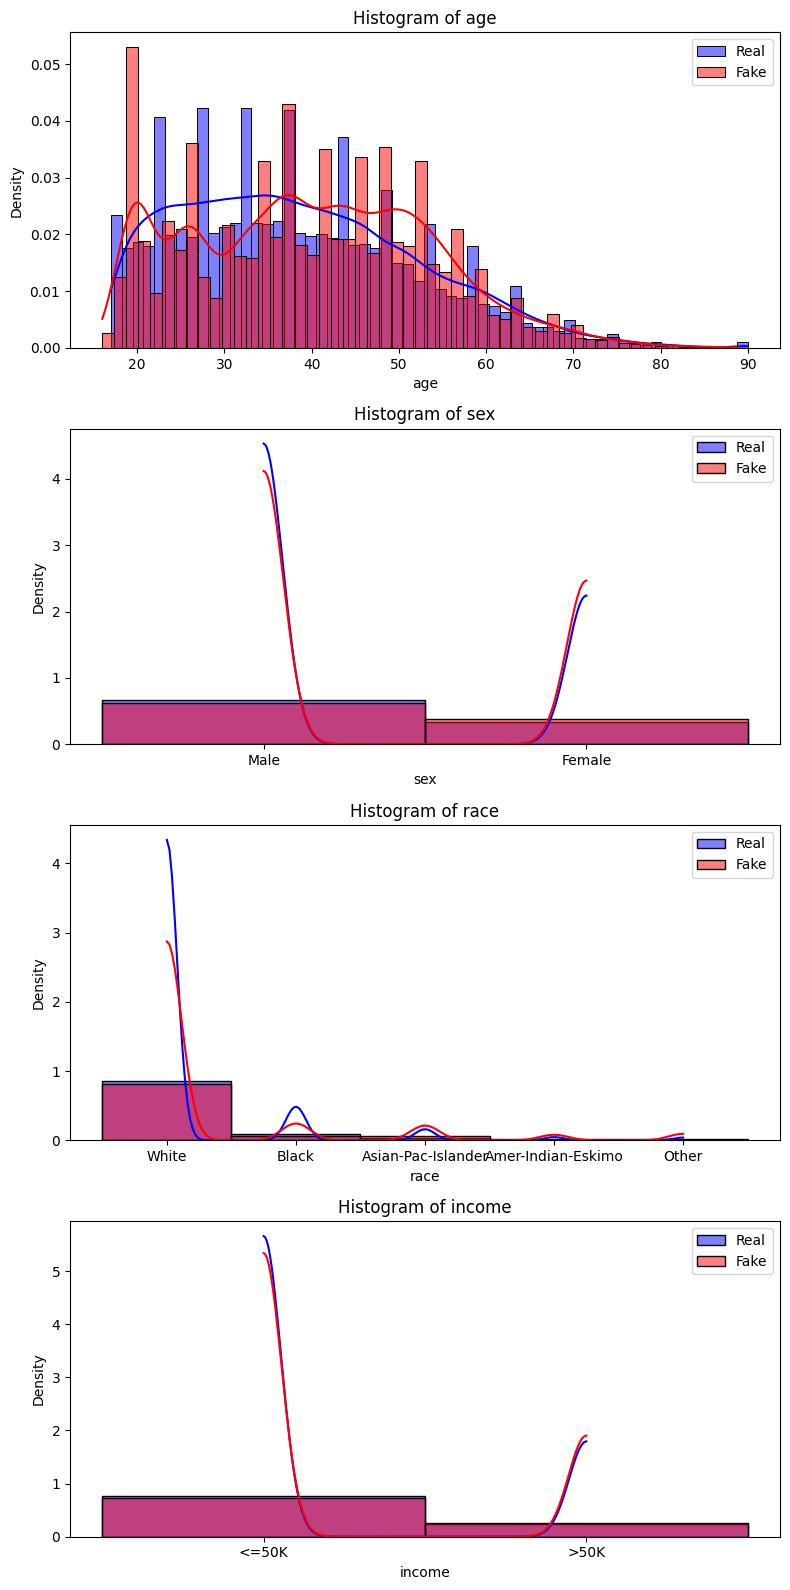

In [15]:
ct.eval_plot(real_data=real_data, plot_type='histogram', features=["age", "sex", "race", "income"])

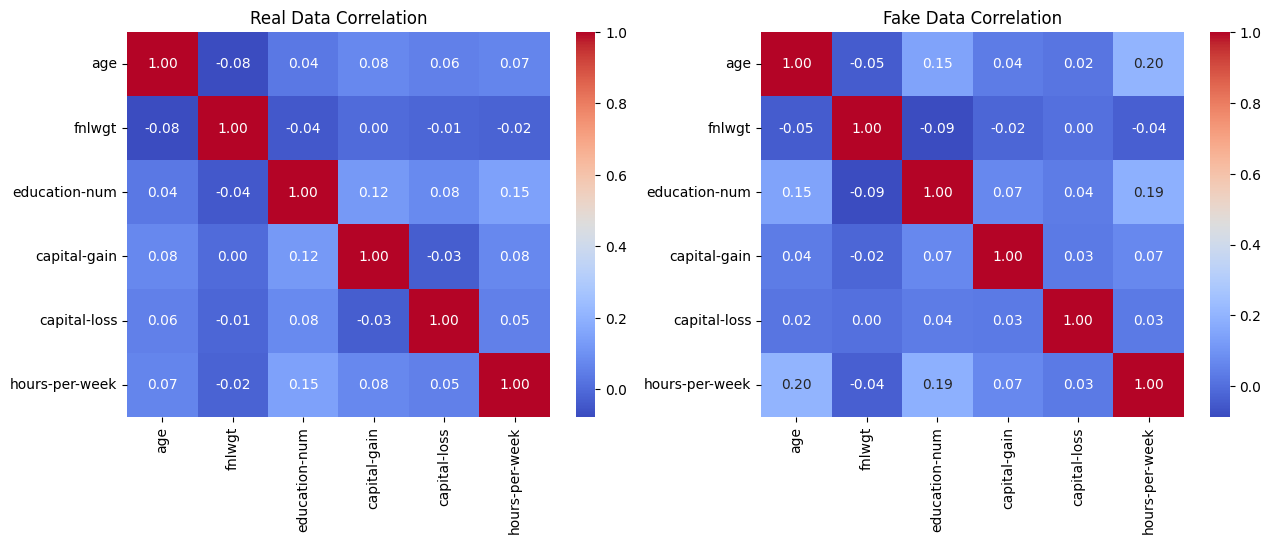

In [6]:
ct.eval_plot(real_data=real_data, plot_type='heatmap', features=["age", "sex", "race", "income"])